In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import time

In [616]:
data = np.loadtxt('data_preprocessed_features')

In [617]:
data = data[:,:2]

In [618]:
def UCB1(data):
    K = len(np.unique(data[:,0]))
    T = data.shape[0]
    r = np.zeros((K,T))
    armReward = np.zeros(K)
    cumReward = np.zeros(T)
    logging_act = data[:,0]
    obs_r = data[:,1]
    N = np.zeros(K)
    R = np.zeros(T)
    r_hat = np.zeros((K,T))
    cum_arm_r = np.zeros(K)

    for t in range(T):
        #print(logging_act[t])
        r_hat[int(logging_act[t]), t] = obs_r[t]*K


    # play each arm once 
    for t in range(K):
        # At time t, arm t is played
        cumReward[t+1] = cumReward[t+1] + r_hat[t,t]
        N[t] += 1
        for a in range(K):
            cum_arm_r[a] += r_hat[a,t]
        R[t+1] = np.max(cum_arm_r) - cumReward[t+1]
        armReward[t] += r_hat[t,t]
    #print('All arms played once')

    for t in tqdm(range(K,T)):
        a_t = np.argmax([armReward[a]/N[a] + np.sqrt((K**2)*np.log(t)/N[a]) for a in range(K)])

        cumReward[t] = cumReward[t-1] + r_hat[a_t,t]
        armReward[a_t] += r_hat[a_t,t]
        for a in range(K):
            cum_arm_r[a] += r_hat[a,t]
        R[t] = np.max(cum_arm_r) - cumReward[t]
        N[a_t] += 1
        
    return R

In [619]:
R_all = UCB1(data)






  0%|          | 0/701666 [00:00<?, ?it/s]




  0%|          | 472/701666 [00:00<02:29, 4690.26it/s]




  0%|          | 886/701666 [00:00<02:35, 4504.24it/s]




  0%|          | 1301/701666 [00:00<02:39, 4385.80it/s]




  0%|          | 1771/701666 [00:00<02:36, 4474.88it/s]




  0%|          | 2272/701666 [00:00<02:31, 4620.38it/s]




  0%|          | 2711/701666 [00:00<02:33, 4547.67it/s]




  0%|          | 3163/701666 [00:00<02:33, 4538.62it/s]




  1%|          | 3580/701666 [00:00<02:44, 4241.98it/s]




  1%|          | 4025/701666 [00:00<02:42, 4301.50it/s]




  1%|          | 4619/701666 [00:01<02:28, 4688.41it/s]




  1%|          | 5181/701666 [00:01<02:21, 4932.36it/s]




  1%|          | 5744/701666 [00:01<02:15, 5120.87it/s]




  1%|          | 6271/701666 [00:01<02:14, 5163.30it/s]




  1%|          | 6791/701666 [00:01<02:25, 4782.09it/s]




  1%|          | 7277/701666 [00:01<02:30, 4617.04it/s]




  1%|          | 7746/701666 [00:01<02:30, 4622.83

Extract the best and the worst arm

In [88]:
K = len(np.unique(data[:,0]))
T = data.shape[0]
logging_act = data[:,0]
obs_r = data[:,1]
r_hat = np.zeros((K,T))

for t in range(T):
    r_hat[int(logging_act[t]), t] = obs_r[t]*K

In [200]:
sort_sum = np.argsort(np.sum(r_hat,axis = -1))

In [179]:
best = sort_sum[0]
idx_best =[]
for i in range(len(logging_act)):
    if logging_act[i] == best:
        idx_best.append(i)

In [90]:
worst = sort_sum[-1]
idx_worst = []
for i in range(len(logging_act)):
    if logging_act[i] == worst:
        idx_worst.append(i)

In [91]:
median = sort_sum[8]
idx_median = []
for i in range(len(logging_act)):
    if logging_act[i] == median:
        idx_median.append(i)

In [201]:
second = sort_sum[-2]
idx_second = []
for i in range(len(logging_act)):
    if logging_act[i] == second:
        idx_second.append(i)


In [205]:
third = sort_sum[-3]
idx_third = []
for i in range(len(logging_act)):
    if logging_act[i] == third:
        idx_third.append(i)

In [212]:
def action_trans(data):
    arms = np.unique(data[:,0])
    #print(arms)
    for a in range(len(arms)):
        for t in range(data.shape[0]):
#             if data[t,0] == 15 == arms[a]:
#                 print('True')
            if int(data[t,0]) == arms[a]:
                #print(data[t,0])
                data[t,0] = a
    return data
            

In [226]:
data_ii = data[np.sort(idx_best + idx_worst)]
data_ii = action_trans(data_ii)

In [227]:
data_iii = data[np.sort(idx_best + idx_worst + idx_second)]
data_iii = action_trans(data_iii)

In [228]:
data_iv = data[np.sort(idx_best + idx_worst + idx_second + idx_third)]
data_iv = action_trans(data_iv)

In [229]:
data_v = data[np.sort(idx_best + idx_worst + idx_median)]
data_v = action_trans(data_v)

In [231]:
R_ii = UCB1(data_ii)

In [238]:
UCB_i = R_all
UCB_ii = R_ii

In [232]:
R_iii = UCB1(data_iii)
R_iv = UCB1(data_iv)
R_v = UCB1(data_v)

In [237]:
UCB_iii = R_iii
UCB_iv = R_iv
UCB_v = R_v

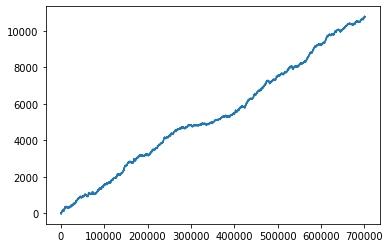

In [620]:
plt.plot(range(data.shape[0]), R_all)
plt.show()

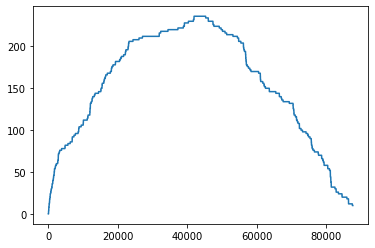

In [131]:
plt.plot(range(data_ii.shape[0]), R_ii)
plt.show()

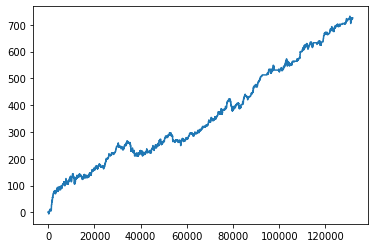

In [234]:
plt.plot(range(data_iii.shape[0]), R_iii)
plt.show()

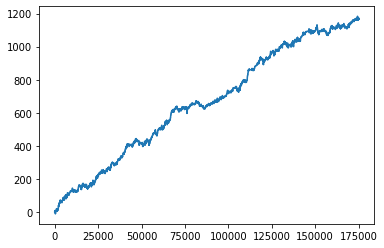

In [233]:
plt.plot(range(data_iv.shape[0]), R_iv)
plt.show()

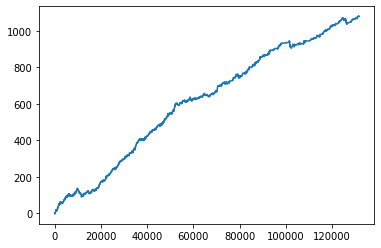

In [257]:
plot = plt.plot(range(data_v.shape[0]), R_v)

In [258]:
plot.title('Plot 1')

AttributeError: 'list' object has no attribute 'title'

In [621]:
def EXP3_any(data):
    K = len(np.unique(data[:,0]))
    T = data.shape[0]
    L = np.zeros((K,T))
    armReward = np.zeros(K)
    cumLoss = np.zeros(T)
    best_Loss = np.zeros(T)
    logging_act = data[:,0]
    obs_r = data[:,1]
    N = np.zeros(K)
    R = np.zeros(T)
    l_hat = np.zeros((K,T))
    cum_arm_l = np.zeros(K)


    for t in range(T):
        l_hat[int(logging_act[t]), t] = (1-obs_r[t])*K
    
    R = np.zeros(T)

        
    for t in tqdm(range(1,T)):
        eta = np.sqrt(np.log(K)/(t*K**2))
        l_tilde = np.zeros(K)
        minL = np.min(L[:,t-1])
        
        #Normalize by using L[a][t-1]-minL
        p = [np.exp(-eta*(L[a,t-1]-minL))/np.sum([np.exp(-eta*(L[b,t-1]-minL)) for b in range(K)]) for a in range(K)]
        a_t = np.random.choice(list(range(K)), size = 1, p = p)[0]

        for a in range(K):
            cum_arm_l[a] += l_hat[a,t]
        cumLoss[t] = cumLoss[t-1] + l_hat[a_t,t]
        best_Loss[t] = np.min(cum_arm_l)
    

        l_tilde[a_t] = l_hat[a_t,t]/p[a_t]
        
        for a in range(K):
            L[a,t] = L[a,t-1] + l_tilde[a]
        
#         if t % 10000 == 0:
#             print(t)
            
    R = cumLoss - best_Loss
        

    
    return R

In [622]:
R_EXP3_all = EXP3_any(data)






  0%|          | 0/701681 [00:00<?, ?it/s]




  0%|          | 82/701681 [00:00<14:17, 818.56it/s]




  0%|          | 156/701681 [00:00<14:47, 790.69it/s]




  0%|          | 215/701681 [00:00<16:19, 716.50it/s]




  0%|          | 275/701681 [00:00<17:16, 676.46it/s]




  0%|          | 335/701681 [00:00<17:59, 649.87it/s]




  0%|          | 405/701681 [00:00<17:36, 663.85it/s]




  0%|          | 487/701681 [00:00<16:36, 703.60it/s]




  0%|          | 554/701681 [00:00<16:54, 691.30it/s]




  0%|          | 620/701681 [00:00<17:18, 674.93it/s]




  0%|          | 685/701681 [00:01<19:09, 609.85it/s]




  0%|          | 746/701681 [00:01<19:56, 585.86it/s]




  0%|          | 805/701681 [00:01<20:24, 572.15it/s]




  0%|          | 870/701681 [00:01<19:43, 591.90it/s]




  0%|          | 930/701681 [00:01<19:51, 588.26it/s]




  0%|          | 994/701681 [00:01<19:24, 601.76it/s]




  0%|          | 1055/701681 [00:01<21:24, 545.25it/s]




  0%|          | 111

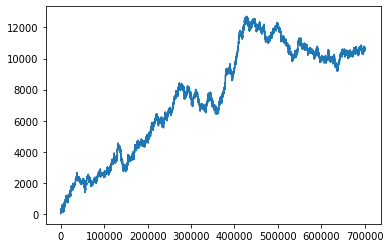

In [628]:
plt.plot(range(data.shape[0]), R_EXP3_all)
plt.show()

In [641]:
def random_str(data):
    K = len(np.unique(data[:,0]))
    T = data.shape[0]
    logging_act = data[:,0]
    cumReward = np.zeros(T)
    obs_r = data[:,1]
    r_hat = np.zeros((K,T))
    best_Reward = np.zeros(T)
    cum_arm_r = np.zeros(K)
    a_t = np.random.choice(list(range(K)),size = T)
   
    for t in range(T):
        r_hat[int(logging_act[t]), t] = obs_r[t]*K
        #best_Reward[t] = np.max(np.sum(r_hat[:,:t], axis = 1))
        for a in range(K):
            cum_arm_r[a] += r_hat[a,t]
        best_Reward[t] = np.max(cum_arm_r)
        cumReward[t] = cumReward[t-1] + r_hat[a_t[t],t]
    
                        
    R = best_Reward - cumReward
    return R
                               






  0%|          | 0/701682 [00:00<?, ?it/s]




  0%|          | 3114/701682 [00:00<00:22, 31138.17it/s]




  1%|          | 6637/701682 [00:00<00:21, 32261.52it/s]




  1%|▏         | 9696/701682 [00:00<00:21, 31740.21it/s]




  2%|▏         | 11961/701682 [00:00<00:24, 28326.37it/s]




  2%|▏         | 14121/701682 [00:00<00:32, 21305.74it/s]




  2%|▏         | 16038/701682 [00:00<00:37, 18400.86it/s]




  3%|▎         | 18691/701682 [00:00<00:33, 20262.23it/s]




  3%|▎         | 21917/701682 [00:00<00:29, 22805.21it/s]




  3%|▎         | 24479/701682 [00:00<00:28, 23580.60it/s]




  4%|▍         | 26919/701682 [00:01<00:32, 20487.58it/s]




  4%|▍         | 29098/701682 [00:01<00:45, 14653.58it/s]




  4%|▍         | 30887/701682 [00:01<00:49, 13477.41it/s]




  5%|▍         | 32940/701682 [00:01<00:44, 15025.04it/s]




  5%|▌         | 35165/701682 [00:01<00:40, 16645.70it/s]




  5%|▌         | 37881/701682 [00:01<00:35, 18832.27it/s]




  6%|▌         | 4099

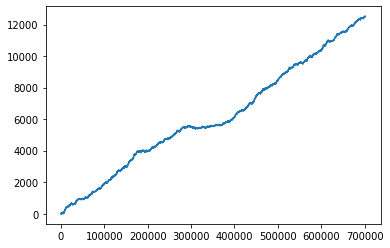

In [640]:
plt.plot(range(data.shape[0]), random_str(data))
plt.show()

In [593]:
def compare(data,setting,B = 10):
    T = data.shape[0]
    K = len(np.unique(data[:,0]))
    emp_EXP3 = np.zeros((B,T))
    emp_rand = np.zeros((B,T))
    regret_bd = np.zeros(T)
    for t in range(T):
        regret_bd[t] = (3/2)*np.sqrt(t*np.log(K))*K
        
    for i in range(B):
        emp_EXP3[i,:]= EXP3_any(data)
        emp_rand[i,:]= random_str(data)

        
    avg_emp_EXP3 = np.mean(emp_EXP3, axis = 0)
    std_emp_EXP3 = np.std(emp_EXP3, axis = 0)/np.sqrt(B)
    
    avg_emp_rand = np.mean(emp_rand, axis = 0)
    std_emp_rand = np.std(emp_rand, axis = 0)/np.sqrt(B)
    
    # Result of UCB1 does not vary over 10 repetition
    avg_emp_UCB1 = UCB1(data)
    std_emp_UCB1 = [0]*T
    
    
    # Plot e
    plt.plot(list(range(1,T+1)),avg_emp_EXP3 , color ='blue', label = 'EXP3, \eta= sqrt(ln K/tK^2)')
    plt.fill_between(list(range(1,T+1)), avg_emp_EXP3 - std_emp_EXP3, avg_emp_EXP3 + std_emp_EXP3, alpha=0.2, color="blue", label ='mean ± std')
    plt.plot(list(range(1,T+1)),avg_emp_UCB1, color = 'orange', label = 'UCB1')
    plt.fill_between(list(range(1,T+1)), avg_emp_UCB1 - std_emp_UCB1, avg_emp_UCB1 + std_emp_UCB1, alpha=0.2, color="orange", label ='mean ± std')
    plt.suptitle('Average Empirical Regret for The 2 Algorithms')
    plt.title(f'Setting ({setting}), {K} arms')
    plt.xlabel('Time t')
    plt.ylabel('Regret at time t')
    plt.legend()
    plt.savefig(f'Compare2_{setting}e.png')
    plt.show()
    
    
    #Plot f
    plt.plot(list(range(1,T+1)),avg_emp_EXP3 , color ='blue', label = 'EXP3, \eta= sqrt(ln K/tK^2)')
    plt.fill_between(list(range(1,T+1)), avg_emp_EXP3 - std_emp_EXP3, avg_emp_EXP3 + std_emp_EXP3, alpha=0.2, color="blue", label ='mean ± std')
    plt.plot(list(range(1,T+1)),avg_emp_UCB1, color = 'orange', label = 'UCB1')
    plt.fill_between(list(range(1,T+1)), avg_emp_UCB1 - std_emp_UCB1, avg_emp_UCB1 + std_emp_UCB1, alpha=0.2, color="orange", label ='mean ± std')
    plt.plot(list(range(1,T+1)),avg_emp_rand, color = 'green', label = 'Random Strategy')
    plt.fill_between(list(range(1,T+1)), avg_emp_rand - std_emp_rand, avg_emp_rand + std_emp_rand, alpha=0.2, color="green", label ='mean ± std')
    plt.plot(list(range(1,T+1)),regret_bd , color ='gray', label = 'Regret bd for EXP3')
    plt.suptitle('Average Empirical Regret for The 2 Algorithms and Random Strategy')
    plt.title(f'Setting ({setting}), {K} arms')
    plt.xlabel('Time t')
    plt.ylabel('Regret at time t')
    plt.legend()
    plt.savefig(f'Compare2_{setting}.png')
    plt.show()

/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


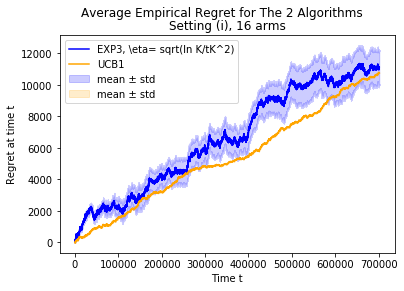

/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


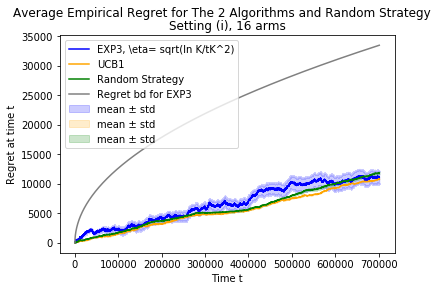

In [594]:
compare(data,'i')

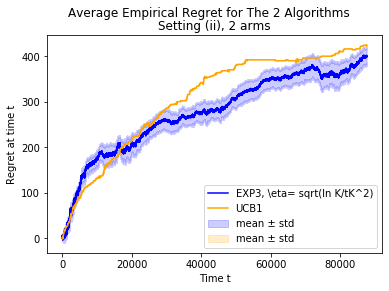

/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


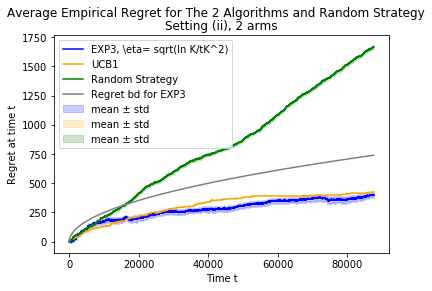

In [595]:
compare(data_ii,'ii')

/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


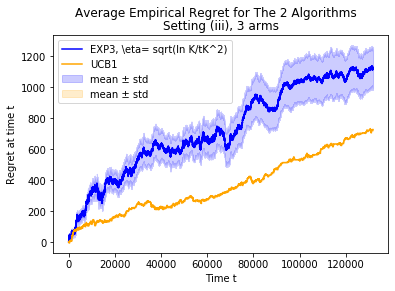

/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


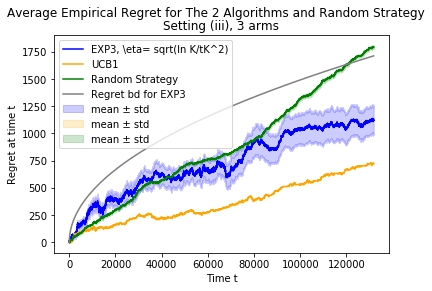

In [596]:
compare(data_iii,'iii')

/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


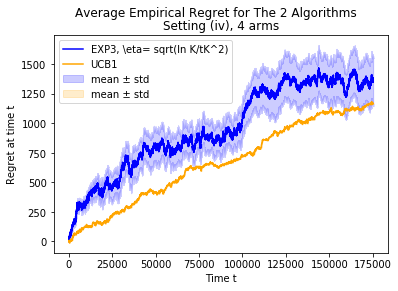

/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


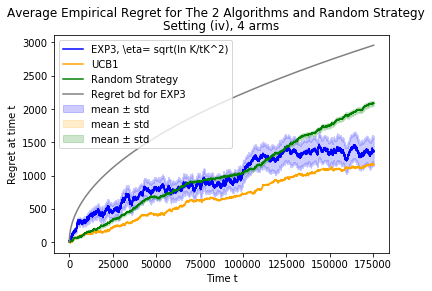

In [597]:
compare(data_iv,'iv')

/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


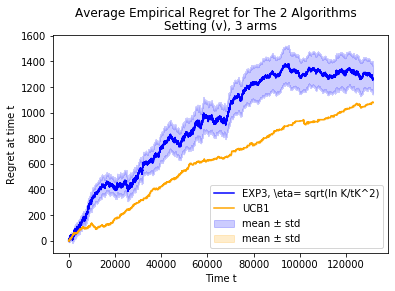

/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/chenyuen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


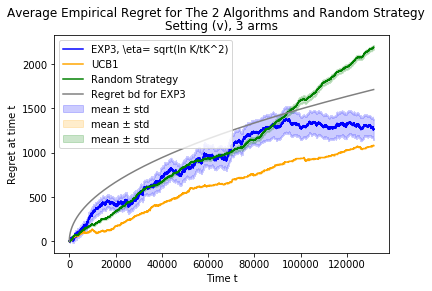

In [598]:
compare(data_v,'v')